In [9]:
import numpy as np
import heapq
import matplotlib.pyplot as plt

def knnSearch(collection, query, k):
    def euclidean_distance(x, y):
        return np.sqrt(np.sum((x - y) ** 2))
    heap = []
    for i in range(len(collection)):
        distance = euclidean_distance(collection[i], query)
        heapq.heappush(heap, (-distance, i))
        if len(heap) > k:
            heapq.heappop(heap)
    return [(i, -d) for d, i in heap]

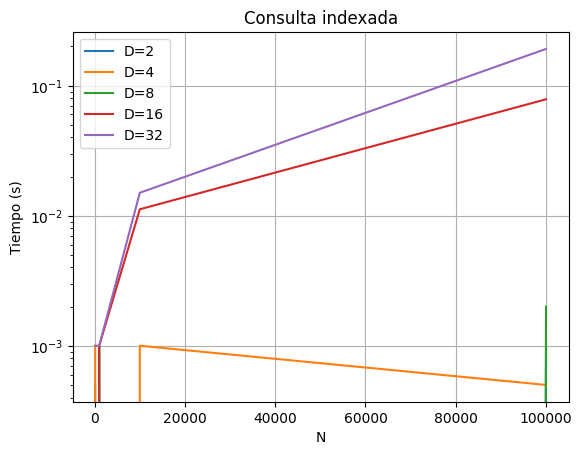

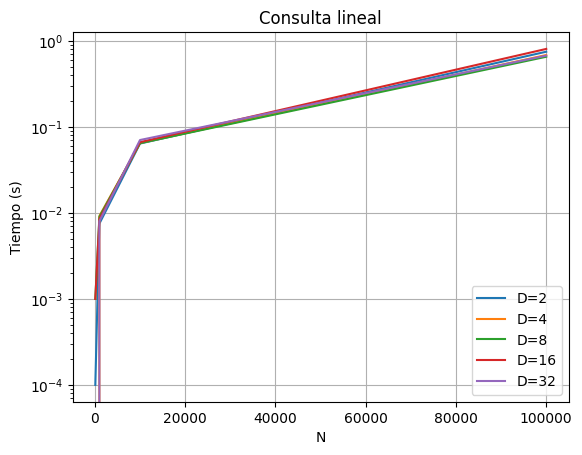

In [11]:
import time
import pandas as pd
import rtree

Ds = [pow(2, i) for i in [1, 2, 3, 4, 5]]
Ns = [pow(10, i) for i in [2, 3, 4, 5]]

tiempos = {}
tiempos2 = {}
for D in Ds: 
    tiempos["D="+str(D)] = list()
    tiempos2["D="+str(D)] = list()
for N in Ns:
    for D in Ds:  
        # establecer propiedades del indice              
        prop = rtree.index.Property()
        prop.dimension = D    # dimension del vector caracteristico
        prop.buffering_capacity = 8    # Cantidad maxima de MBRs en un nodo 
        ind = rtree.index.Index(properties = prop)
        # Generar los datos    
        data = np.random.sample((N,D))
        # insertar los puntos                
        for i in range(data.shape[0]):
            ind.insert(i, data[i])    
        
        query = data[0]        
       
        # aplicar la consulta indexada                   
        start_time = time.time()                
        ind.nearest(query, num_results=2)
        tiempos["D="+str(D)].append(round(time.time() - start_time, 4))

        # aplicar la consulta lineal
        start_time = time.time()                
        knnSearch(data, query, k=8);
        tiempos2["D="+str(D)].append(round(time.time() - start_time, 4))

        ind.close()

results = pd.DataFrame.from_dict(tiempos)
results.index = Ns
results

results2 = pd.DataFrame.from_dict(tiempos2)
results2.index = Ns
results2

results.plot(logy = True)
plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta indexada')
plt.grid()
plt.show()

results.to_csv('results.csv')

results2.plot(logy = True)
plt.xlabel('N')
plt.ylabel('Tiempo (s)')
plt.title('Consulta lineal')
plt.grid()
plt.show()

results2.to_csv('results2.csv')